In [28]:
# PURPOSE: Identify highest frequency words and phrases from corporate earnings call
# TRANSCRIPT SOURCE: https://investors.nike.com/investors/news-events-and-reports/investor-news/investor-news-details/2021/NIKE-Inc.-Announces-Third-Quarter-Fiscal-2021-Earnings-and-Conference-Call/default.aspx
import pandas as pd 
import numpy as np
import itertools
import collections
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [29]:
# Creates a list of words.
# RESOURCE: http://stanford.edu/class/msande448/2017/Midterm/gr1.pdf
listOfWords = []                                                      # Create empty list to fill with words
previous = ""                                                         # Create empty string to store previous word
with open('FY21_Q3_Earnings_Call.txt', 'r') as f:                     # Open TXT Transcript file
    for line in f:                                                    # Loop through each line
        for word in line.split():                                     # Split a string into a list where each word is a list item
            word = word.lower()                                       # Lower-case each word
            if word[len(word)-1] ==',' or word[len(word)-1] == '.':   # This does something to evaluate the length of the word
                word = word[:len(word)-1]                             # store current word in WORD
            listOfWords.append(word)                                  # append current word to LISTOFWORDS

In [30]:
# Remove stopwords from LISTOFWORDS
stop_words = set(stopwords.words('english'))                                                      # <== original list of stopwords
more_stop_words = {"both", "we're", "us", "--", "quarter", "year", "new", "also", "prior", "continue", "nike", "think", "versus", "see", "seeing", "https://www.capitaliq.com/ciqdotnet/transcripts/streaming.aspx#/?keydevid=704815282"}
words_remove_stopwords = [w for w in listOfWords if not w in stop_words]                          # Scrub LISTOFWORDS
words_remove_allstopwords = [w for w in words_remove_stopwords if not w in more_stop_words]       # Scrub LISTOFWORDS

In [31]:
# Create a list of 2-word phrases
listOfPhrases2 = []                                        # Create empty list to fill with 2-word phrases
previous = ""                                              # Create empty string to store previous word
for word in words_remove_allstopwords:                     # loop through list of words
    phrase = previous+" "+word                             # store current and previous word in WORD
    listOfPhrases2.append(phrase)                          # append current phrase to LISTOFPHRASES 
    previous = word                                        # store current word in PREVIOUS

In [32]:
# Create a list of 3-word phrases
listOfPhrases3 = []                                        # Create empty list to fill with 3-word phrases
previous1 = ""                                             # Create empty string to store previous word
previous2 = ""                                             # Create empty string to store previous previous word
for word in words_remove_allstopwords:                     # loop through list of words
    phrase = previous2+" "+previous1+" "+word              # store current and previous word in WORD
    listOfPhrases3.append(phrase)                          # append current phrase to LISTOFPHRASES 
    previous2 = previous1                                  # store PREVIOUS1 word in PREVIOUS2
    previous1 = word                                       # store current word in PREVIOUS1

In [33]:
# Create counter
counts_words = collections.Counter(words_remove_allstopwords)
counts_phrases2 = collections.Counter(listOfPhrases2)
counts_phrases3 = collections.Counter(listOfPhrases3)

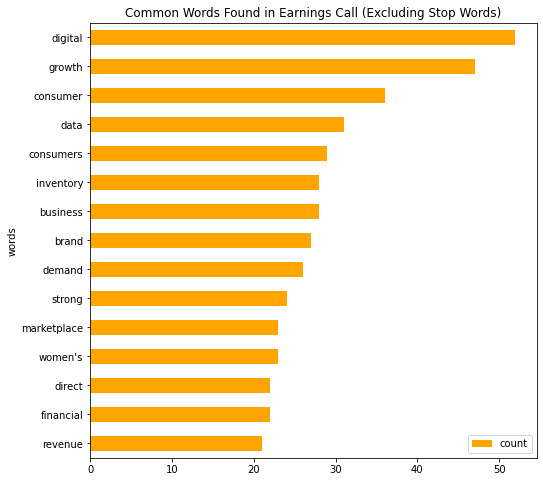

In [36]:
# Create a DataFrame and bar chart containing the most common words
clean_words_df = pd.DataFrame(counts_words.most_common(15), columns=['words', 'count'])        # Create DataFrame
fig, ax = plt.subplots(figsize=(8, 8))                                                         # Create horizontal bar chart
clean_words_df.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="orange")  # Plot horizontal bar chart
ax.set_title("Common Words Found in Earnings Call (Excluding Stop Words)")                     # Set bar chart title
plt.show()                                                                                     # Display bar chart

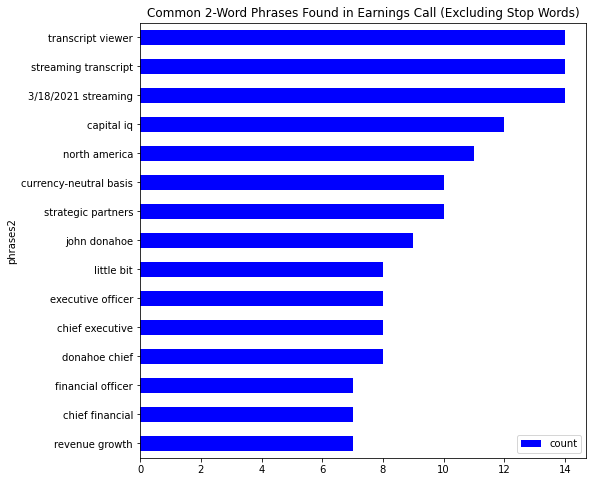

In [37]:
# Create a DataFrame and bar chart containing the most common 2-word phrases
phrases2_df = pd.DataFrame(counts_phrases2.most_common(15), columns=['phrases2', 'count'])     # Create DataFrame
fig, ax = plt.subplots(figsize=(8, 8))                                                         # Create horizontal bar chart
phrases2_df.sort_values(by='count').plot.barh(x='phrases2', y='count', ax=ax, color="blue")    # Plot horizontal bar chart
ax.set_title("Common 2-Word Phrases Found in Earnings Call (Excluding Stop Words)")            # Set bar chart title
plt.show()                                                                                     # Display bar chart

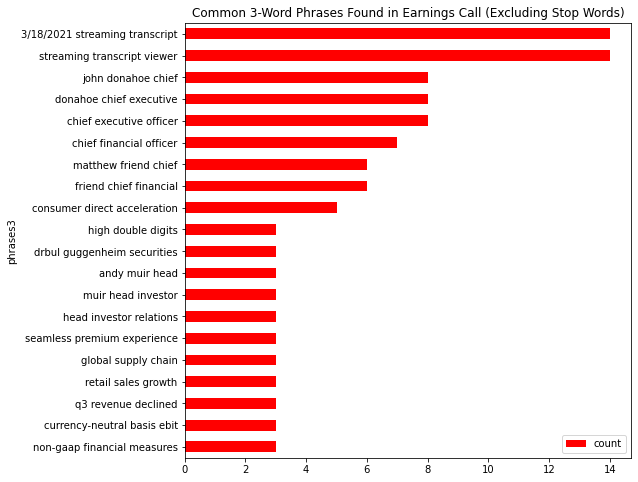

In [40]:
# Create a DataFrame and bar chart containing the most common 3-word phrases
phrases3_df = pd.DataFrame(counts_phrases3.most_common(20), columns=['phrases3', 'count'])     # Create DataFrame
fig, ax = plt.subplots(figsize=(8, 8))                                                         # Create horizontal bar chart
phrases3_df.sort_values(by='count').plot.barh(x='phrases3', y='count', ax=ax, color="red")    # Plot horizontal bar chart
ax.set_title("Common 3-Word Phrases Found in Earnings Call (Excluding Stop Words)")            # Set bar chart title
plt.show()                                                                                     # Display bar chart